# TDA: Mapper

## Preparación de Datos

Importación de Librerías

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import kmapper as km
import umap
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.spatial.distance import cdist

c:\Users\chuby\anaconda3\envs\topo\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Importación de datos
data = pd.read_csv("df_complete_renamed_columns.csv")

Se utilizan únicamente los datos después de la pandemia para comparar las relaciones actuales entre las variables y no las de una situación anormal. 

In [3]:
data_desp_pandemia = data[data['Fecha'] > '2020-12']

Se traspone la matriz para que cada registro represente la serie de tiempo de algún factor. 

In [4]:
data_total = data.T
data_total.columns = data_total.iloc[0]
data_total = data_total[1:]

In [5]:
data_t = data_desp_pandemia.T

Se ajustan los nombres de las columnas

In [6]:
data_t.columns = data_t.iloc[0]
data_t = data_t[1:]
data_t.head()

Fecha                          2021-01        2021-02        2021-03  \
CNA_Alambre              198355.195812  144821.617071  189971.004021   
CNA_Alambre y derivados   184761.71962  137291.204729  184832.922824   
CNA_Alambrón             230154.511226  186907.387717  247137.457107   
CNA_Arrabio              236485.562514    213893.2086  280229.549912   
CNA_Barras               114259.473401  118555.948135  134797.369339   

Fecha                          2021-04        2021-05        2021-06  \
CNA_Alambre              199477.962199  212789.738789  210511.864619   
CNA_Alambre y derivados  193528.417612  207763.257851  200938.580267   
CNA_Alambrón             276822.330583  279350.256508  261067.241307   
CNA_Arrabio              254621.882585  285984.278895  234921.022848   
CNA_Barras               116633.986197   132290.17879  131126.560269   

Fecha                          2021-07        2021-08        2021-09  \
CNA_Alambre              204618.195801   197042.16924  200811.437535   
CNA_Alambre y derivados  197445.112701  191635.552029  194888.029145   
CNA_Alambrón             244961.331416  239842.386884  249200.073898   
CNA_Arrabio              216974.965124  279366.477745  279241.291124   
CNA_Barras               108040.461653  127854.931353  122605.865113   

Fecha                          2021-10  ...        2023-03        2023-04  \
CNA_Alambre              175683.390334  ...  169535.916862  175039.418803   
CNA_Alambre y derivados  168387.684391  ...  165770.308291  172741.190337   
CNA_Alambrón             218005.269571  ...  224679.508037  239373.014377   
CNA_Arrabio              236243.936263  ...   94104.388991   97525.325128   
CNA_Barras               120160.421048  ...  124378.145807  113004.326425   

Fecha                          2023-05        2023-06        2023-07  \
CNA_Alambre              184664.253468  181124.341025  141034.651115   
CNA_Alambre y derivados  178764.749702   178412.77626  139080.357412   
CNA_Alambrón             251989.039717  246878.308011  199934.358382   
CNA_Arrabio               90619.592315    89922.13351   77594.237316   
CNA_Barras               128390.163261  118923.079859   128466.99271   

Fecha                          2023-08        2023-09        2023-10  \
CNA_Alambre              165910.371602  174441.278982  166568.337656   
CNA_Alambre y derivados  162654.971559  171331.582338  162373.907175   
CNA_Alambrón             235360.591619  238775.923161   238762.37733   
CNA_Arrabio              113446.081886    80735.72532   84746.996311   
CNA_Barras               126365.304918  117723.352882  130400.006153   

Fecha                          2023-11        2023-12  
CNA_Alambre              188783.719761   155222.74656  
CNA_Alambre y derivados  185273.189197  149884.991504  
CNA_Alambrón             248940.638547  208678.189234  
CNA_Arrabio               80051.629395   134815.72763  
CNA_Barras               123237.808629  104459.618419  

[5 rows x 36 columns]

Se revisa que no haya valores nulos

In [7]:
data_t[data_t.isnull().any(axis=1)]

Empty DataFrame
Columns: [2021-01, 2021-02, 2021-03, 2021-04, 2021-05, 2021-06, 2021-07, 2021-08, 2021-09, 2021-10, 2021-11, 2021-12, 2022-01, 2022-02, 2022-03, 2022-04, 2022-05, 2022-06, 2022-07, 2022-08, 2022-09, 2022-10, 2022-11, 2022-12, 2023-01, 2023-02, 2023-03, 2023-04, 2023-05, 2023-06, 2023-07, 2023-08, 2023-09, 2023-10, 2023-11, 2023-12]
Index: []

[0 rows x 36 columns]

Se realiza normalización por columna, es decir, por serie de tiempo

In [8]:
def zscore_normalize_by_row(df: pd.DataFrame) -> np.ndarray:
    scaler = StandardScaler()
    return np.vstack([
        scaler.fit_transform(row.values.reshape(-1, 1)).flatten()
        for _, row in df.iterrows()
    ])

normalized_array = zscore_normalize_by_row(data_t)

In [9]:
normalized_total = zscore_normalize_by_row(data_total)

In [10]:
normalized_df = pd.DataFrame(
    normalized_total,
    index=data_total.index,
    columns=data_total.columns
)

## Proyecciones Mapper

In [11]:
umap_model2D = umap.UMAP(
    n_components=2,  
    n_neighbors=10,  
    min_dist=0.1,    
    metric='euclidean',
    random_state= 624
)
projected_umap2D = umap_model2D.fit_transform(normalized_array)

c:\Users\chuby\anaconda3\envs\topo\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\chuby\anaconda3\envs\topo\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\1319915994.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(projected_umap2D[:, 0], projected_umap2D[:, 1], cmap='Spectral', s=10)


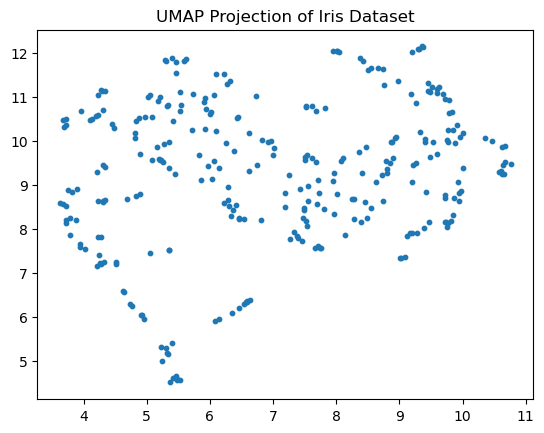

In [12]:
plt.scatter(projected_umap2D[:, 0], projected_umap2D[:, 1], cmap='Spectral', s=10)
plt.title('UMAP Projection of Iris Dataset')
plt.show()

In [13]:
mapper = km.KeplerMapper(verbose=1)

KeplerMapper(verbose=1)


## Funciones para Mapper

Función para colorear el mapper y la proyección

In [14]:
data_t_numeric = data_t.apply(pd.to_numeric, errors='coerce')
pattern = data_t_numeric.loc['CNA_PLANOS'].values 
color_function = data_t_numeric.apply(lambda row: pearsonr(row.values, pattern)[0], axis=1)

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3469389546.py:3: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  color_function = data_t_numeric.apply(lambda row: pearsonr(row.values, pattern)[0], axis=1)


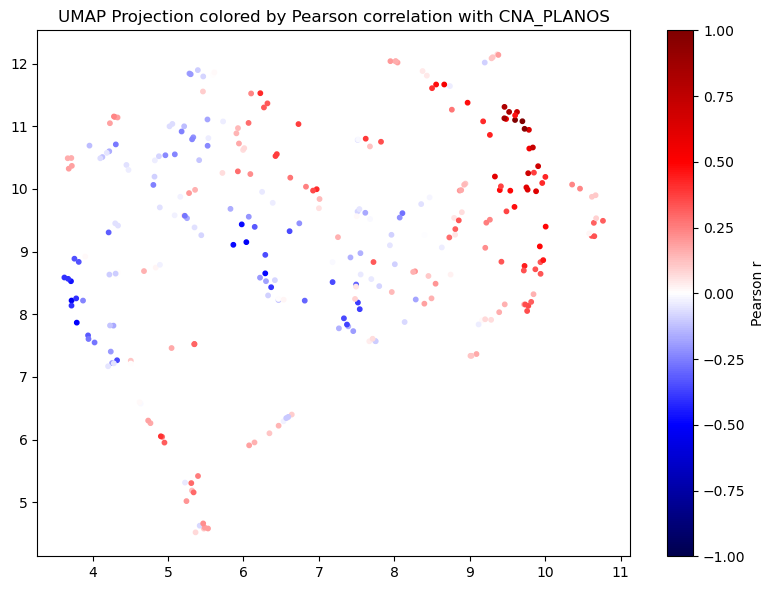

In [15]:
plt.figure(figsize=(8, 6))

plt.scatter(
    projected_umap2D[:, 0], 
    projected_umap2D[:, 1], 
    c=color_function, 
    cmap='seismic', 
    s=10, 
    vmin=-1, vmax=1
)
plt.title('UMAP Projection colored by Pearson correlation with CNA_PLANOS')
plt.colorbar(label='Pearson r')
plt.tight_layout()
plt.show()

Función que genera el mapper y lo visualiza, para cambiar el clusterizador, es manualmente. 
Se da el nombre de la proyección, la cantidad de cubos, overlap, la proyección, 
y como se usa dbscan se necesitan los valores para eps, min_samples y metric. 

In [16]:
def mapping(nombre, cubes, overlap, projected_data, ep, samples, met):
    
    covering = km.Cover(n_cubes=cubes, perc_overlap=overlap)
    print(covering)

    G = mapper.map(
        projected_data,
        normalized_array,
        cover=covering,
        clusterer=DBSCAN(eps=ep, min_samples=samples, metric=met) #AgglomerativeClustering(n_clusters=3, linkage = "average") 
    )
    print(G['meta_data'])

    nombre_html = f"{nombre}.html"
    mapper.visualize(
        G,
        title=f"Mapper - {nombre}",
        path_html=nombre_html,
        color_values= color_function,
        color_function_name='Parecidos a PLANOS',
        #node_color_function=np.array(['average', 'std', 'sum', 'max', 'min'])
    )

    return G 


## Presentación de Resultados

Asigna los puntos según el nodo al que pertencen

In [17]:
# Función para obtener nodos de los mapper
def clusters_nodo(G, index_to_ticker):
    clusters = {}
    for node in G["nodes"]:
        clusters[node] = [index_to_ticker[idx] for idx in G["nodes"][node]]
    return clusters

Nos da algunos datos de los clusters, cuántos hay, cuántos elementos tiene etc. 

In [18]:
def info_clusters(clusters):
    cluster_sizes = {cluster: len(tickers) for cluster, tickers in clusters.items()}
    print(f"Número de clusters: {len(clusters)}")
    print(f"Promedio de elementos por cluster: {np.mean(list(cluster_sizes.values())):.2f}")
    print(f"Cluster más grande: {max(cluster_sizes, key=cluster_sizes.get)} con {max(cluster_sizes.values())} elementos")
    print(f"Cluster más pequeño: {min(cluster_sizes, key=cluster_sizes.get)} con {min(cluster_sizes.values())} elementos")

Función para graficar las proyecciones y los clusters (solo funciona para 2D)

In [19]:
def plot_clusters(clusters, projected,valores):
    plt.figure(figsize=(8, 6))
    colors = plt.cm.tab20(np.linspace(0, 1, len(clusters)))
    color_map = {}
    for i, cluster_name in enumerate(clusters.keys()):
        color_map[cluster_name] = colors[i]

    leyenda_agregada = set()

    for i, ticker in enumerate(data_t.index):
        point_clusters = [c for c, tickers in clusters.items() if ticker in tickers]
        
        if point_clusters:
            cluster = point_clusters[0]
            x, y = projected[i, 0], projected[i, 1]
            if cluster not in leyenda_agregada:
                plt.scatter(x, y, color=color_map[cluster], alpha=0.7, s=50, label=cluster)
                leyenda_agregada.add(cluster)
            else:
                plt.scatter(x, y, color=color_map[cluster], alpha=0.7, s=50)

            if len(point_clusters) > 1:
                plt.scatter(x, y, facecolors='none', edgecolors='black', s=80)

    for i, ticker in enumerate(data_t.index):
        if ticker in valores:
            x, y = projected[i, 0], projected[i, 1]
            plt.scatter(x, y, color='black', s=80, label='Destacado' if 'Destacado' not in leyenda_agregada else None)
            leyenda_agregada.add('Destacado')

    plt.title('Espacio de proyección')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.grid(True, alpha=0.3)
    plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Llama las funciones anteriores para mostrar todo lo obtenido de alguna proyección, y su mapa. Se imprime a que clusters pertenecen las variables de interés "PLANOS".

In [20]:
def info_show(map, projected,valor):
    index_to_ticker = dict(enumerate(data_t.index))
    ticker_to_index = {ticker: idx for idx, ticker in index_to_ticker.items()}
    clusters= clusters_nodo(map, index_to_ticker)
    info_clusters(clusters)
    plot_clusters(clusters, projected,valor)


Cover(n_cubes=4, perc_overlap=0.12, limits=None, verbose=0)
Mapping on data shaped (304, 36) using lens shaped (304, 2)

Creating 16 hypercubes.

Created 18 edges and 14 nodes in 0:00:00.581503.
{'projection': 'custom', 'n_cubes': 4, 'perc_overlap': 0.12, 'clusterer': 'DBSCAN(eps=10, min_samples=10)', 'scaler': 'None', 'nerve_min_intersection': 1}
Wrote visualization to: UMAP.html
Número de clusters: 14
Promedio de elementos por cluster: 26.79
Cluster más grande: cube9_cluster0 con 45 elementos
Cluster más pequeño: cube5_cluster0 con 13 elementos


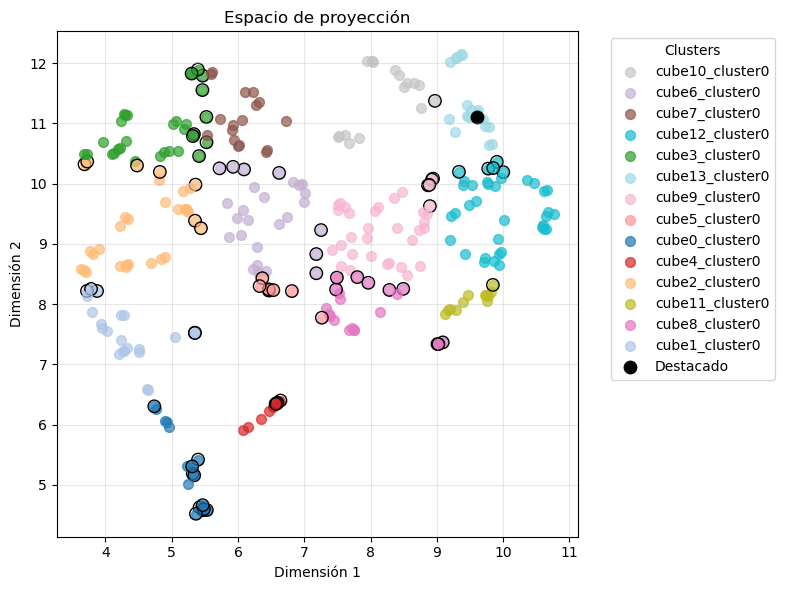

In [21]:
G_umap = mapping("UMAP",4,0.12,projected_umap2D,10,10,"euclidean")
info_show(G_umap,projected_umap2D,valor = ["CNA_PLANOS"])

In [22]:
index_to_ticker = dict(enumerate(data_t.index))
ticker_to_index = {ticker: idx for idx, ticker in index_to_ticker.items()}
clusters_umap= clusters_nodo(G_umap, index_to_ticker)

In [23]:
datos = normalized_df.T

Función para graficar las series temporales por clúster.

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


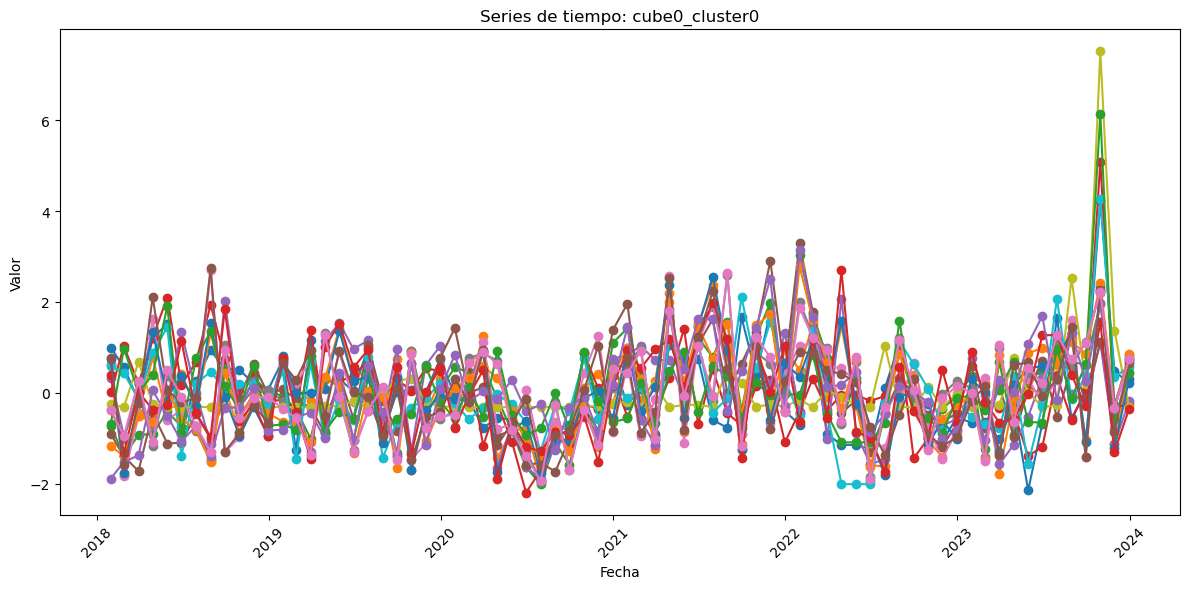

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


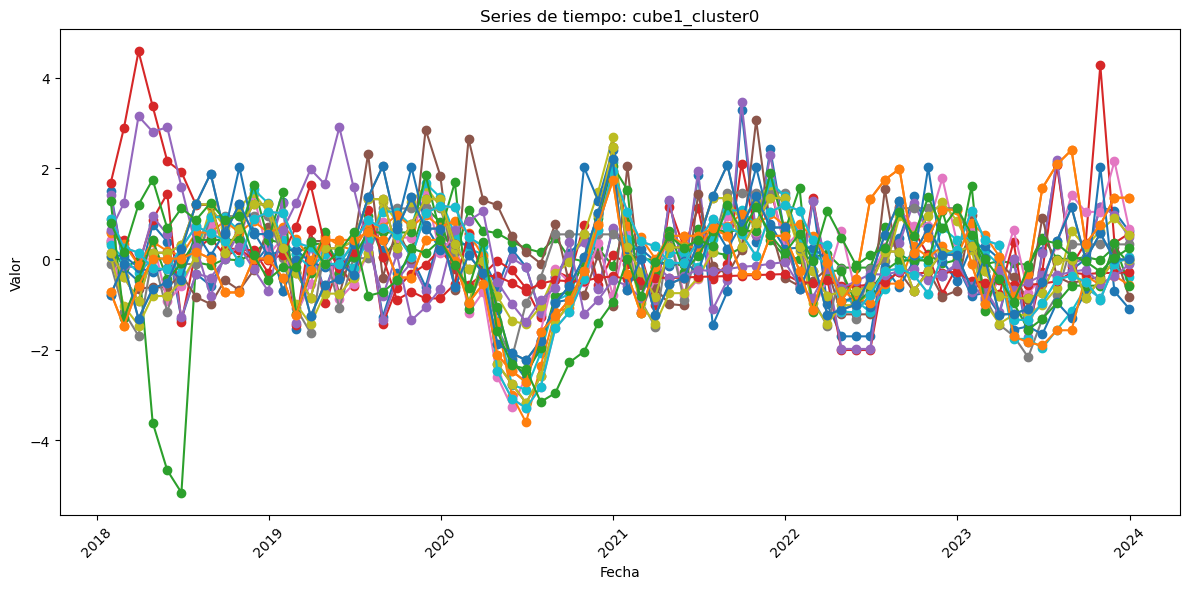

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


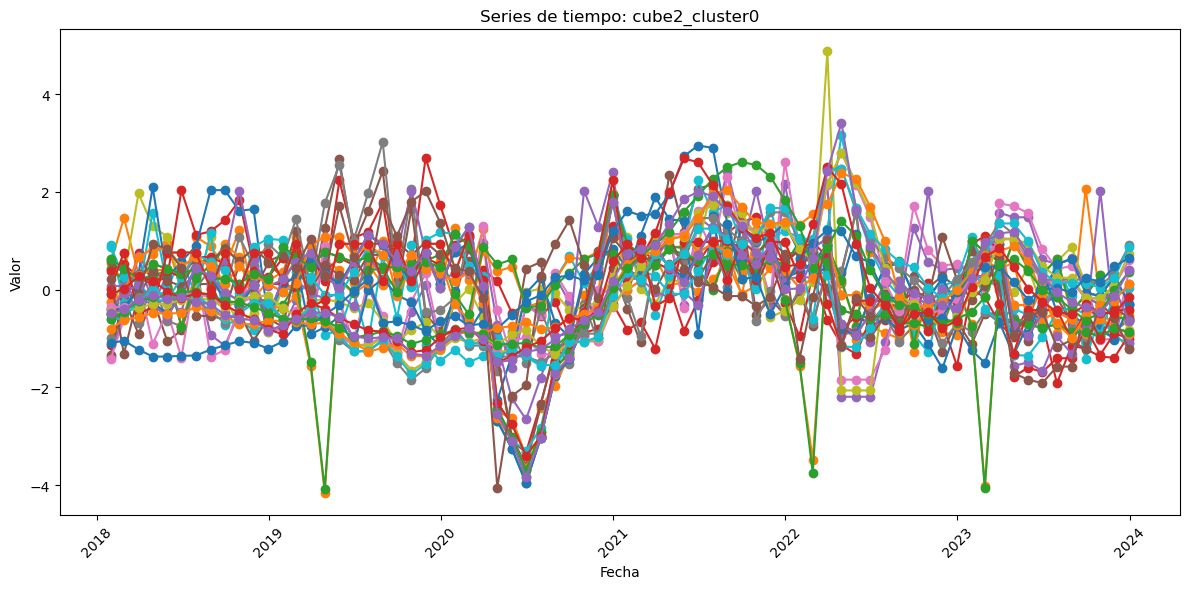

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


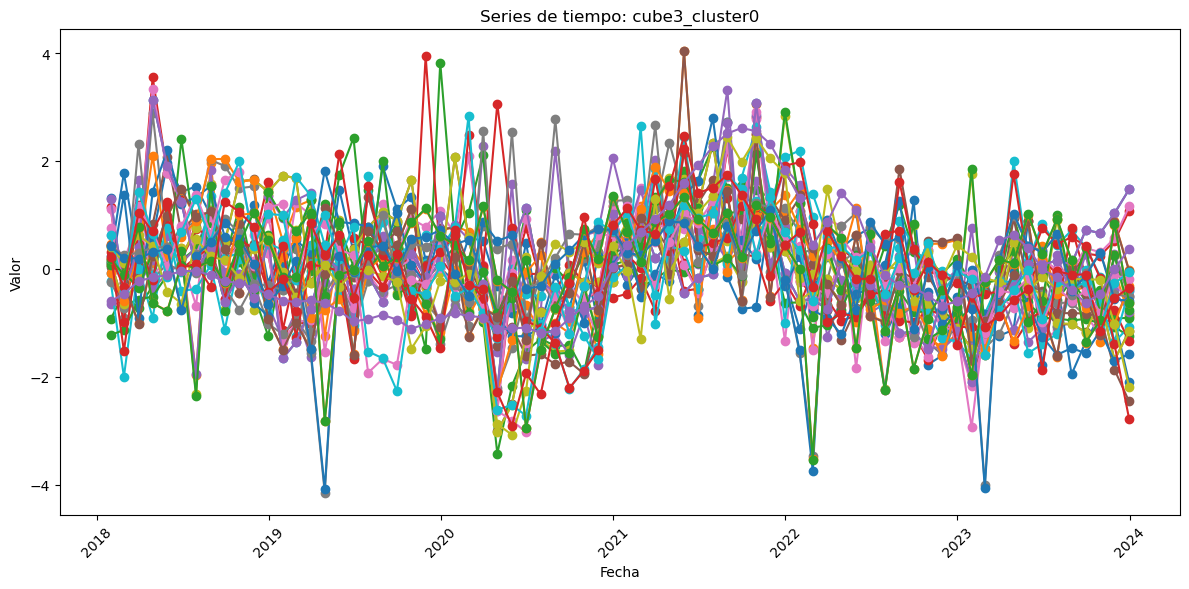

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


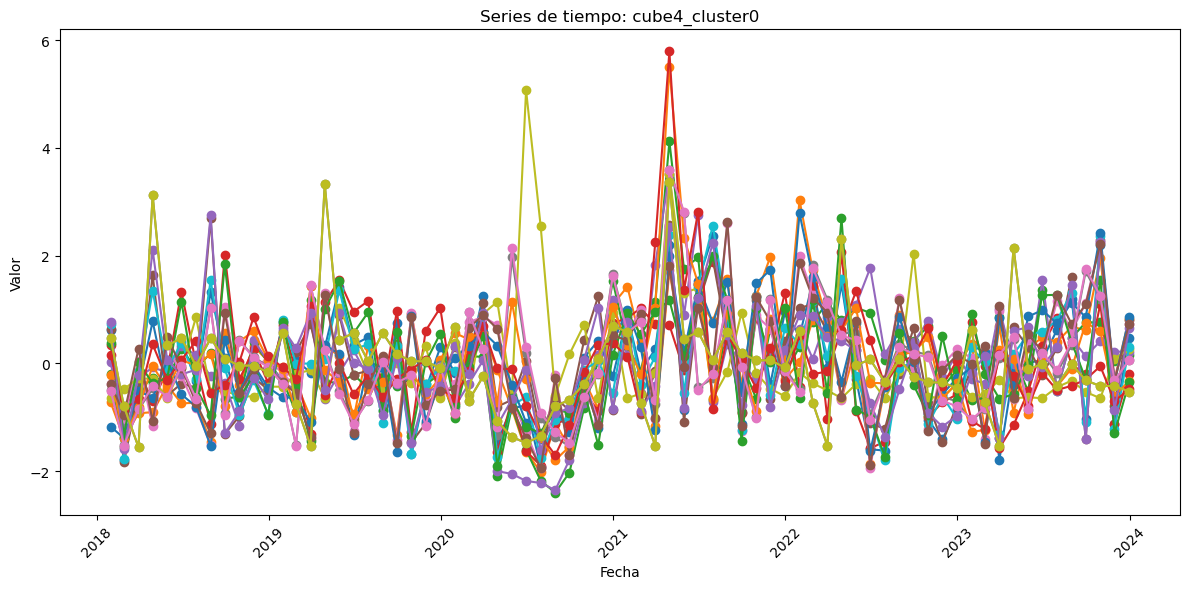

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


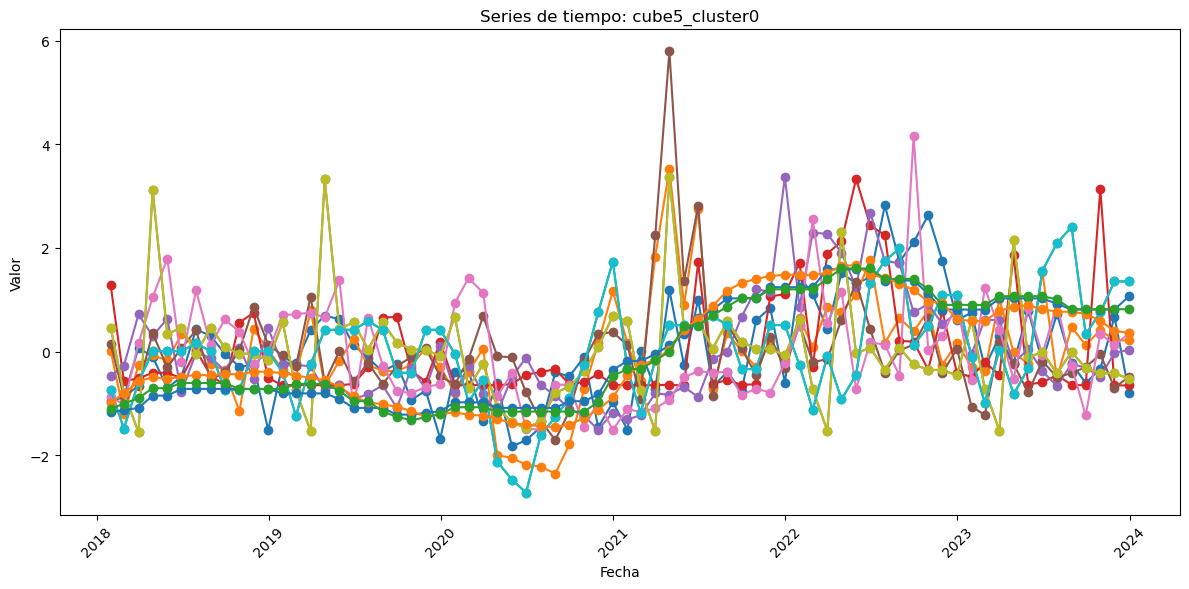

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


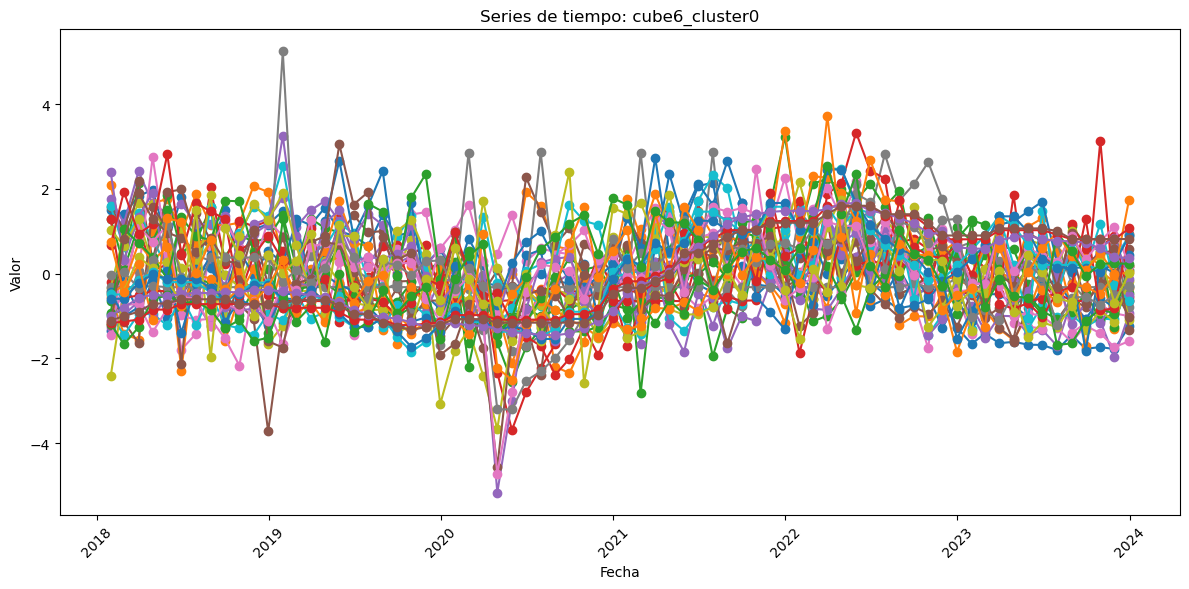

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


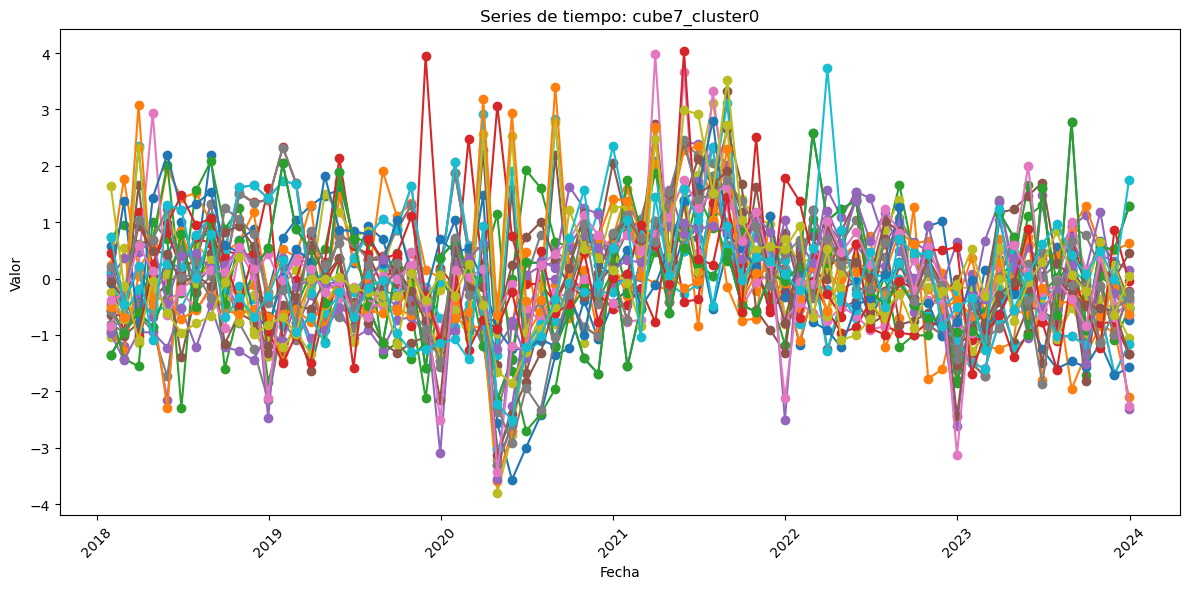

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


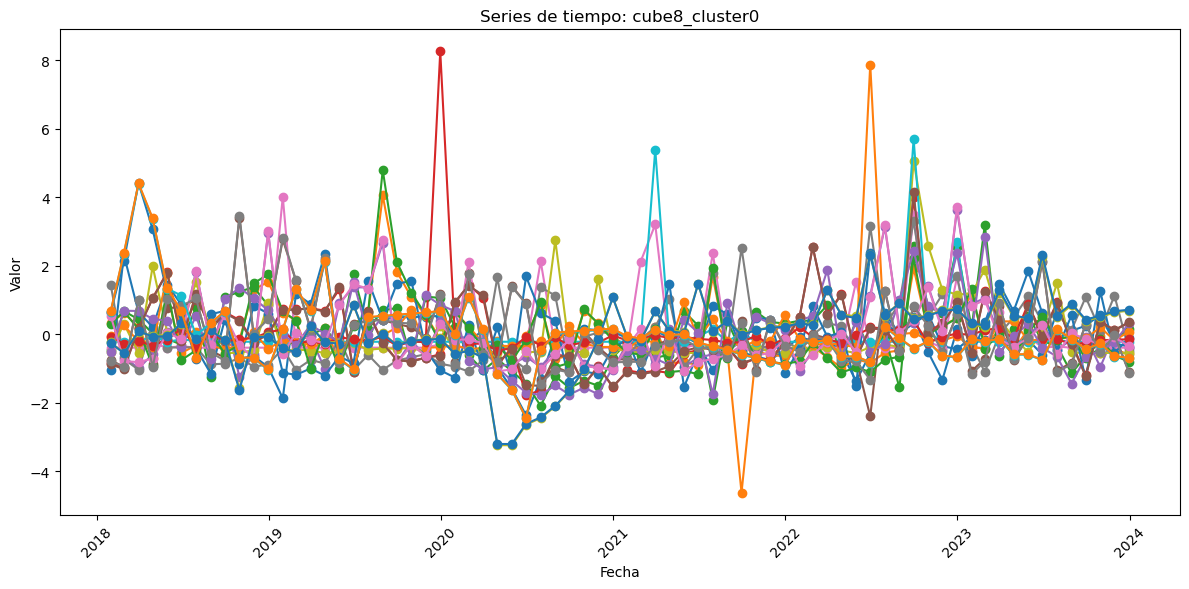

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


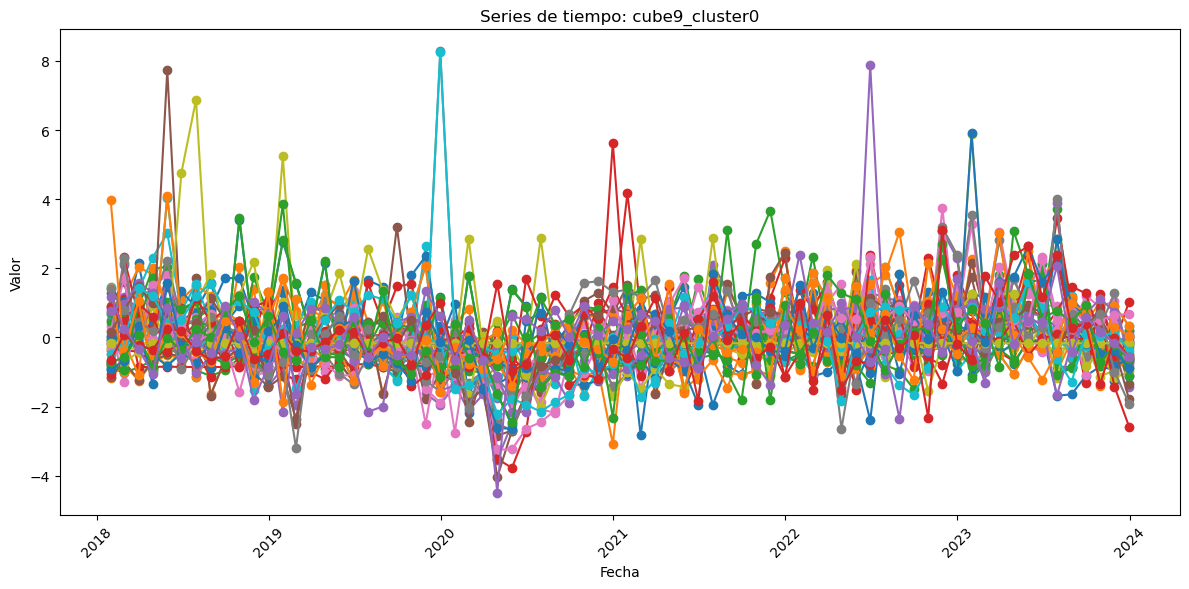

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


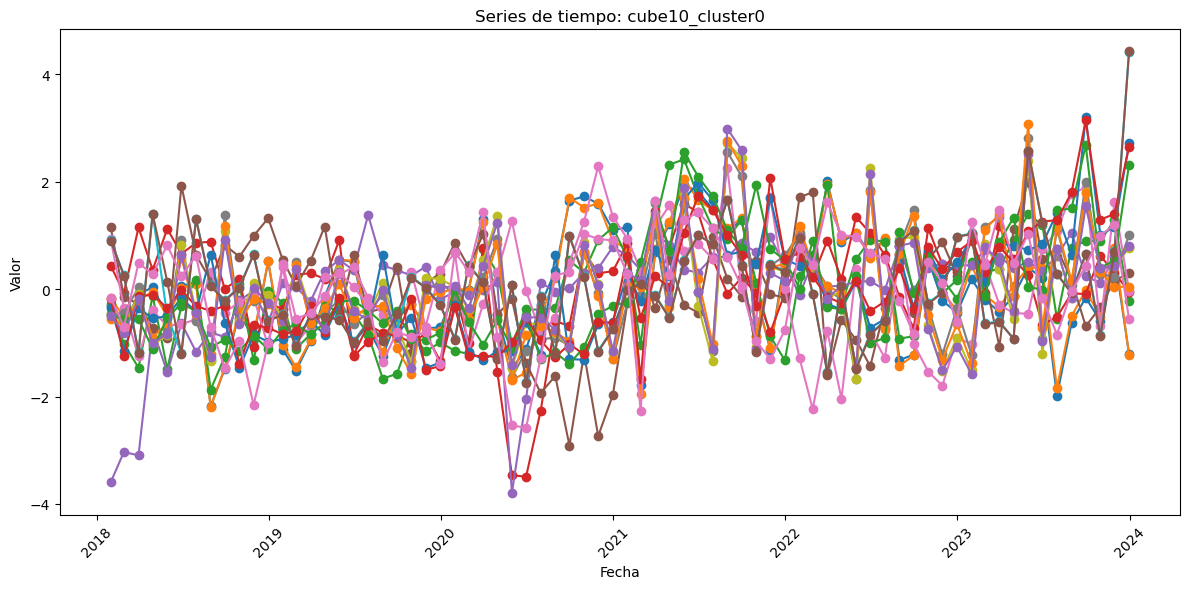

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


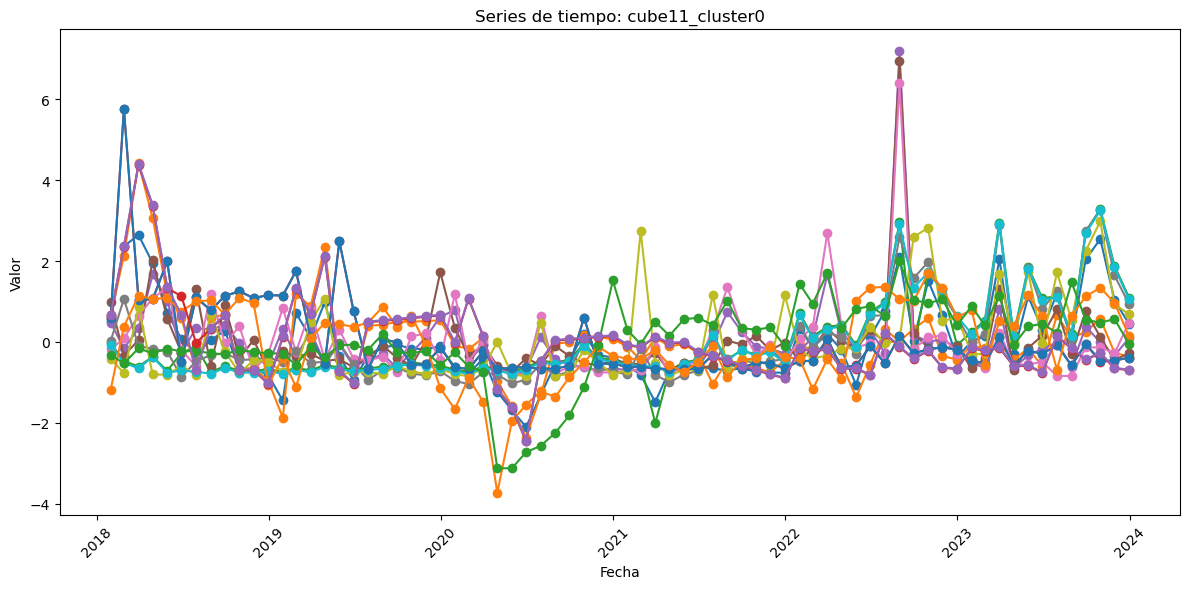

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


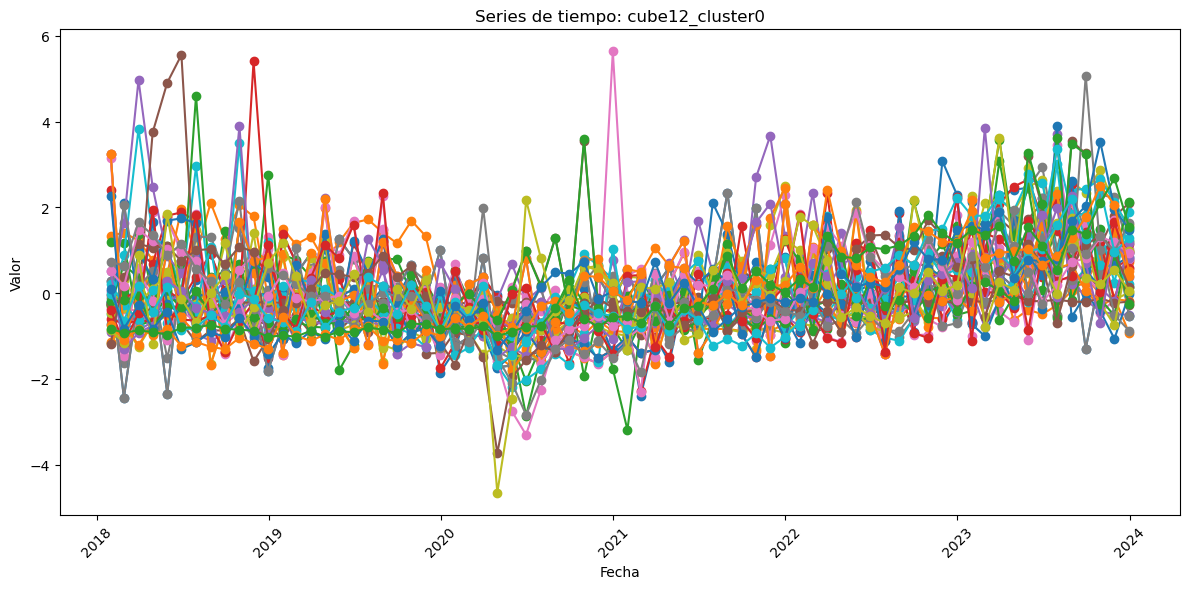

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


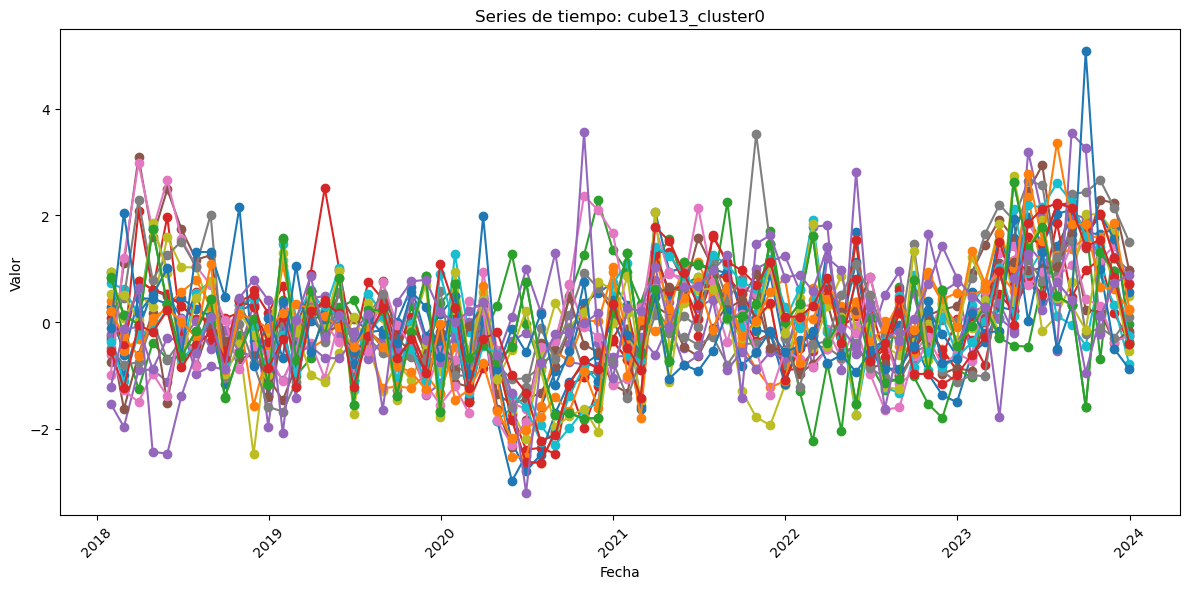

In [24]:
def graficar_series_temporales(data: pd.DataFrame, fecha_inicio='2018-01', frecuencia='M', titulo='Series de tiempo'):
    fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)
    df = data.copy()
    df['Fecha'] = fechas

    plt.figure(figsize=(12, 6))
    for columna in df.columns:
        if columna != 'Fecha':
            plt.plot(df['Fecha'], df[columna], label=columna, marker='o')
    
    plt.title(titulo)
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Recorremos cada cluster y graficamos las series de ese grupo
for nombre_cluster, columnas in clusters_umap.items():
    data2 = datos[columnas]  # Extrae las columnas indicadas por el cluster
    graficar_series_temporales(data2, titulo=f"Series de tiempo: {nombre_cluster}")


## Variables Representativas

Función para calcular los puntos más centrales, es decir, las variables representativas. 

In [25]:
def serie_mas_central_euclidiano(series_array):
    # series_array: lista o array (n_series, n_tiempo)
    dist_matrix = cdist(series_array, series_array, metric='euclidean')
    mean_dists = dist_matrix.mean(axis=1)
    idx_central = np.argmin(mean_dists)
    return idx_central 

In [26]:
series = []
for nombre_cluster, columnas in clusters_umap.items(): 
    data2 = datos[columnas]
    data2_array = np.array(data2).T  # Transponer: columnas = series
    idx_serie = serie_mas_central_euclidiano(data2_array)
    nombre_serie = data2.columns[idx_serie]
    series.append(nombre_serie)
    print(nombre_cluster, nombre_serie)

cube0_cluster0 consumo_laminados_guatemala
cube1_cluster0 prod_laminados_cuba
cube2_cluster0 consumo_largos_república_dominicana
cube3_cluster0 consumo_laminados_chile
cube4_cluster0 impo_laminados_el_salvador
cube5_cluster0 PRECIO_TERMINADOS_platePlacaDeHoja
cube6_cluster0 precio_Chicago - Shredded Auto
cube7_cluster0 prod_laminados_brasil
cube8_cluster0 consumo_tubos sin costura_ecuador
cube9_cluster0 consumo_laminados_argentina
cube10_cluster0 impo_laminados_honduras
cube11_cluster0 consumo_laminados_venezuela
cube12_cluster0 CNA_Planchón
cube13_cluster0 consumo_laminados_méxico


Se intercambia la variable en el clúster donde se encuentra Planos, y se agrega también la Fecha. 

In [27]:
series.remove("consumo_laminados_méxico")
series.append("CNA_PLANOS")
series.append("Fecha")

In [28]:
mapper_columns = data[series]

In [29]:
mapper_columns.columns

Index(['consumo_laminados_guatemala', 'prod_laminados_cuba',
       'consumo_largos_república_dominicana', 'consumo_laminados_chile',
       'impo_laminados_el_salvador', 'PRECIO_TERMINADOS_platePlacaDeHoja',
       'precio_Chicago - Shredded Auto', 'prod_laminados_brasil',
       'consumo_tubos sin costura_ecuador', 'consumo_laminados_argentina',
       'impo_laminados_honduras', 'consumo_laminados_venezuela',
       'CNA_Planchón', 'CNA_PLANOS', 'Fecha'],
      dtype='object')

In [30]:
normalized_mapper = zscore_normalize_by_row(mapper_columns.drop(columns = ["Fecha"]).T)

In [31]:
normalized_mapper = pd.DataFrame(
    normalized_mapper,
    index=mapper_columns.drop(columns = ["Fecha"]).columns,
    columns=mapper_columns.drop(columns = ["Fecha"]).index
)

Se grafican las variables representativas.

C:\Users\chuby\AppData\Local\Temp\ipykernel_23416\3323008852.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start=fecha_inicio, periods=data.shape[0], freq=frecuencia)


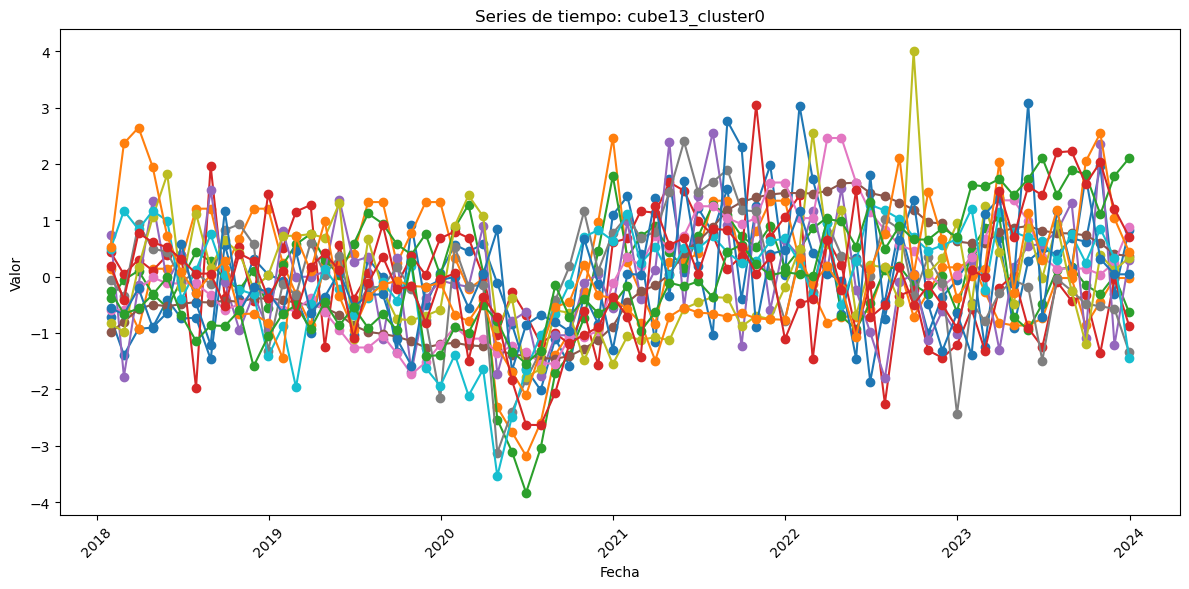

In [32]:
graficar_series_temporales(normalized_mapper.T, titulo=f"Series de tiempo: {nombre_cluster}")

In [33]:
valor = mapper_columns.columns

Se grafica la proyección destacando las variables representativas. 

Número de clusters: 14
Promedio de elementos por cluster: 26.79
Cluster más grande: cube9_cluster0 con 45 elementos
Cluster más pequeño: cube5_cluster0 con 13 elementos


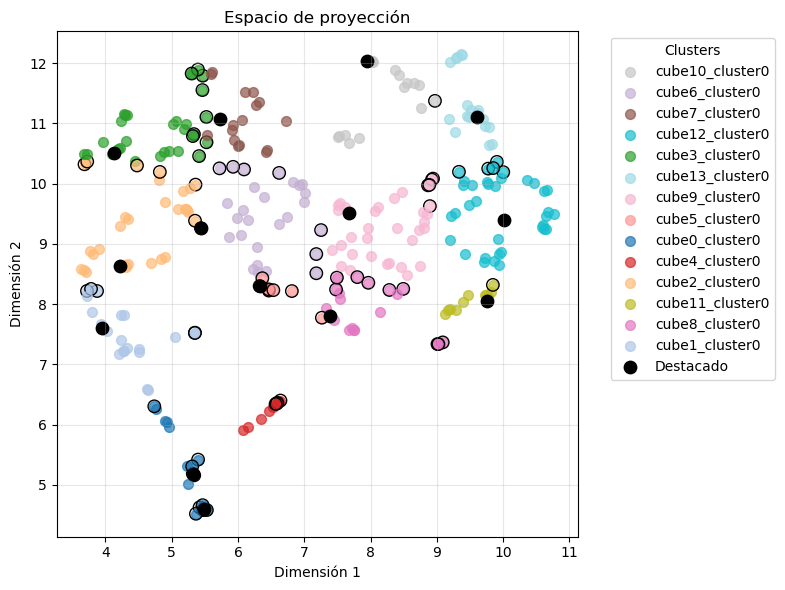

In [34]:
info_show(G_umap,projected_umap2D,valor)

Se exporta el df con las variables representativas. 

In [35]:
mapper_columns.to_csv("basedatosmapper(624).csv")